In [152]:
import numpy as np
import pandas as pd
import sys
import json
import os
import copy
import matplotlib.pyplot as plt
import scipy
import multiprocessing
import h5py
import corner
import emcee

Import sasmples:

In [153]:
cluster_data = h5py.File('../2010-07-06.h5', 'r')  # import data
accepted, samples, log_prob = np.array(cluster_data['mcmc']['accepted']), np.array(cluster_data['mcmc']['chain']), np.array(cluster_data['mcmc']['log_prob'])

Plot chain for mass:

Text(0, 0.5, 'mass')

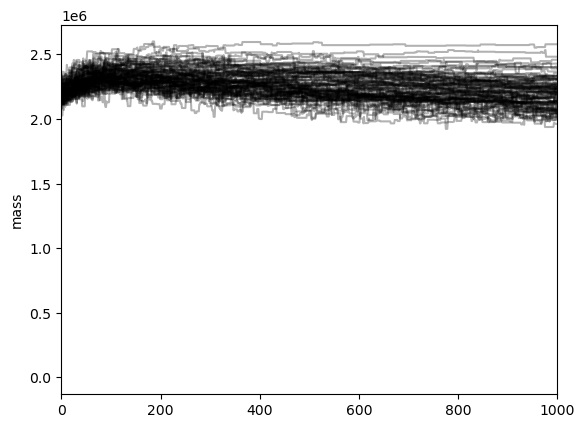

In [154]:
plt.plot(samples[:, :, 0], 'k', alpha=0.3)
plt.xlim(0, 1000)
plt.ylabel('mass')

And for each fragment:

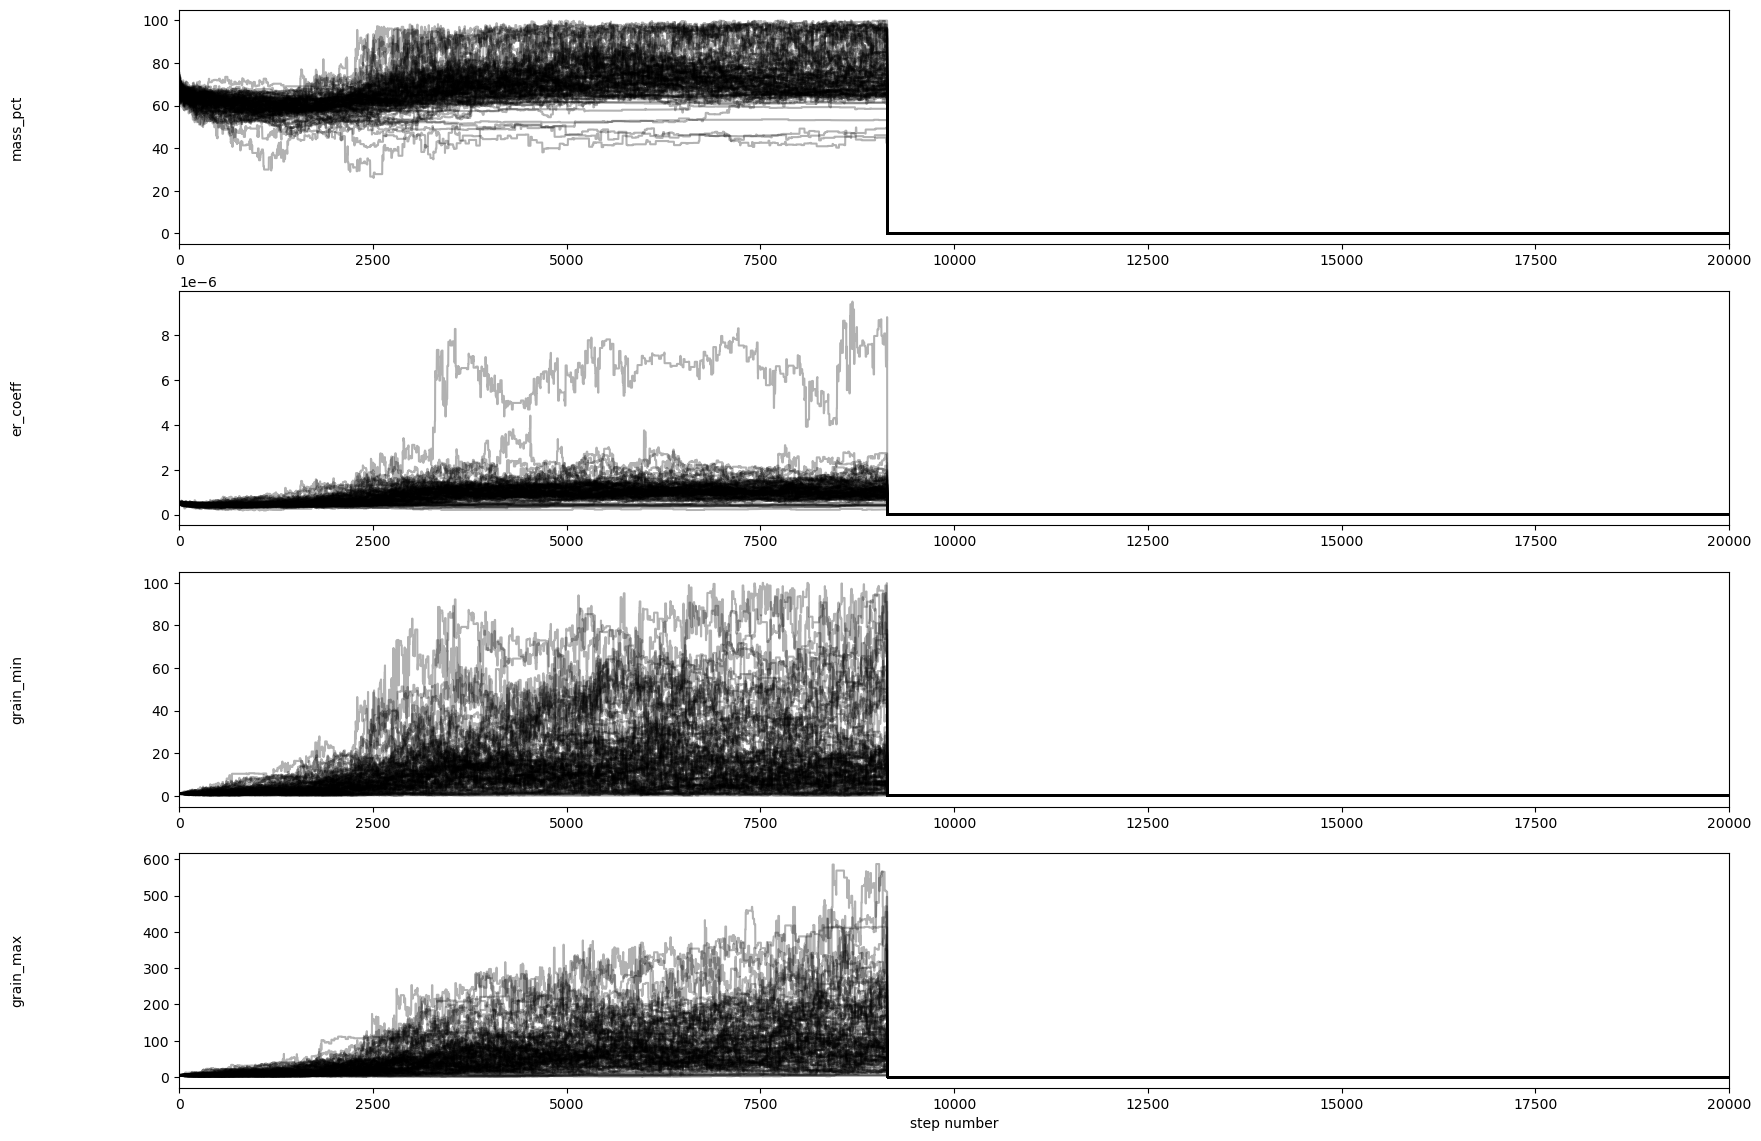

In [167]:
_, axes = plt.subplots(4, figsize=(20, 14))
labels1 = ['mass_pct', 'er_coeff', 'grain_min', 'grain_max']
frag_num = 3  # 1-4, fragment number

for i in range(4):
    ax = axes[i]
    ax.plot(samples[:, :, i*4 + frag_num], 'k', alpha = 0.3)
    ax.set_xlim(0, 20000)
    ax.set_ylabel(labels1[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
    
axes[-1].set_xlabel("step number");

And $1$-D marginalized histograms for masses:

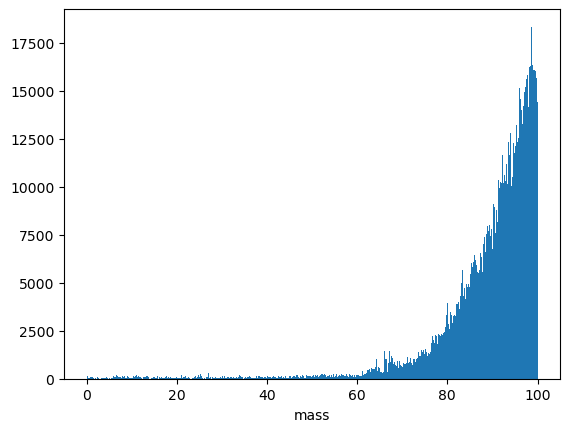

In [166]:
mass_ind = 4

flat_samples_mass = samples[:, :, mass_ind].flatten()
fs_mass_nonzero = flat_samples_mass[flat_samples_mass != 0]
plt.hist(fs_mass_nonzero, bins='auto')
plt.xlabel('mass')
plt.show()

Autocorrelation analysis: integrated autocorrelation time:

In [75]:
emcee.autocorr.integrated_time(samples, c=5, tol=50, quiet=False, has_walkers=True)

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 17 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 1000;
tau: [6374.50452255 6107.69147978 6065.43051335 6268.27344297 6355.53629248
 5964.32734071 5662.40279956 6050.17294138 6251.74451361 4811.99629097
 4307.32956363 4599.369232   5823.33551653 4833.08819808 3484.94203069
 3885.56365442 5646.59673736]

Acceptance fraction:

In [160]:
nwalkers = 100
np.sum(accepted)/(9000 * nwalkers)

0.09887111111111112